# **Finding Corners**

####**In this lesson we'll learn:**
1. To use Harris Corners to find corners
2. Use Good Features to Track (good for tracking)

### **Great Blogs:**
- https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html (***)
- https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html (***)
- https://docs.opencv.org/3.4/d4/d7d/tutorial_harris_detector.html (Theory)
- https://blog.ekbana.com/skew-correction-using-corner-detectors-and-homography-fda345e42e65 (Applications)


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-06 05:51:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.58
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  12.3MB/s    in 2.3s    

2023-05-06 05:51:42 (12.3 MB/s) - ‘images.zip’ saved [29586716/29586716]



## **What is a Corner?**

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination.

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/edge.png)

### **Harris Corner Detection** is an algorithm developed in 1988 for corner detection that works fairly well.


**Paper** - http://www.bmva.org/bmvc/1988/avc-88-023.pdf

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)




(608, 609)


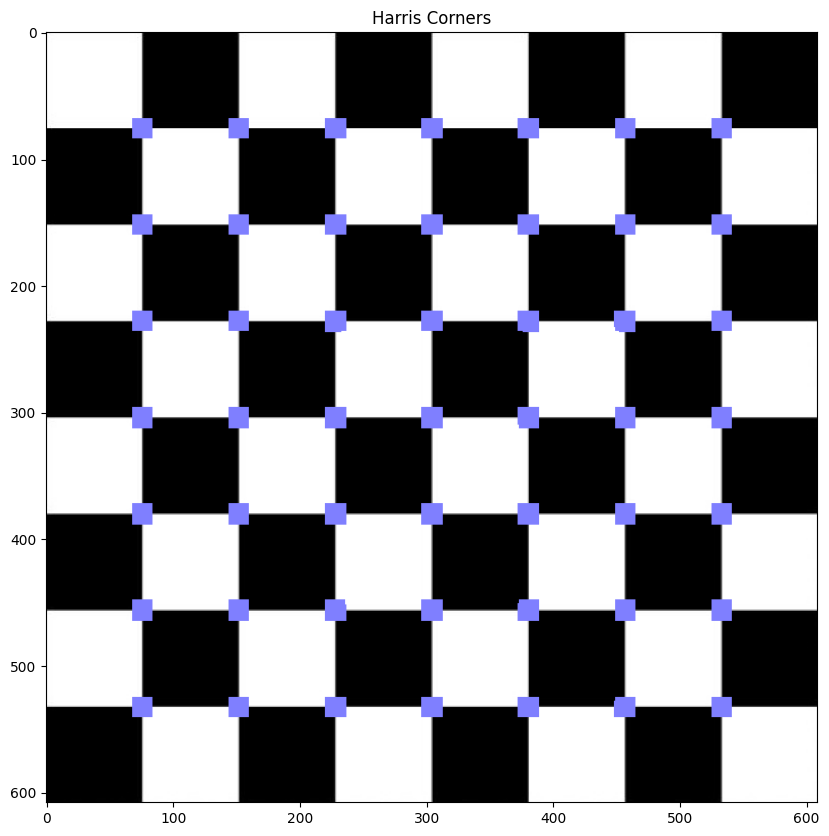

In [8]:
# Load image then grayscale
image = cv2.imread('images/chess.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)
print(harris_corners.shape)
#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

imshow('Harris Corners', image)

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.


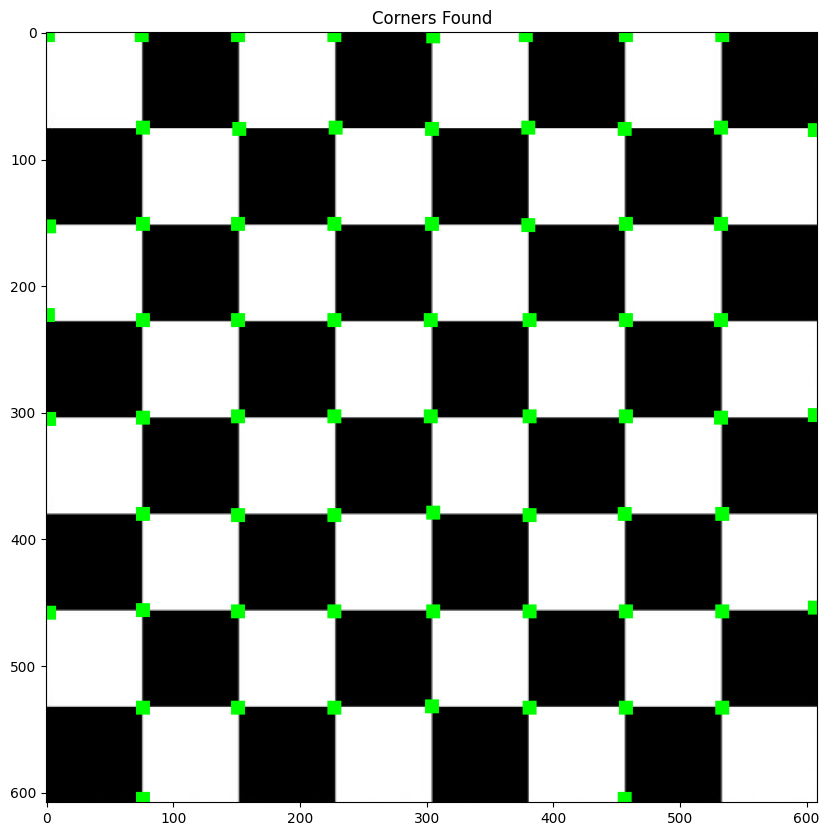

In [6]:
img = cv2.imread('images/chess.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-5,y-5),(x+5,y+5),(0,255,0), -1)
    
imshow("Corners Found", img)

## **Alternative way:**

(194, 94)
(166, 157)
(222, 157)
(104, 184)
(282, 184)
(166, 212)
(221, 212)
(194, 272)


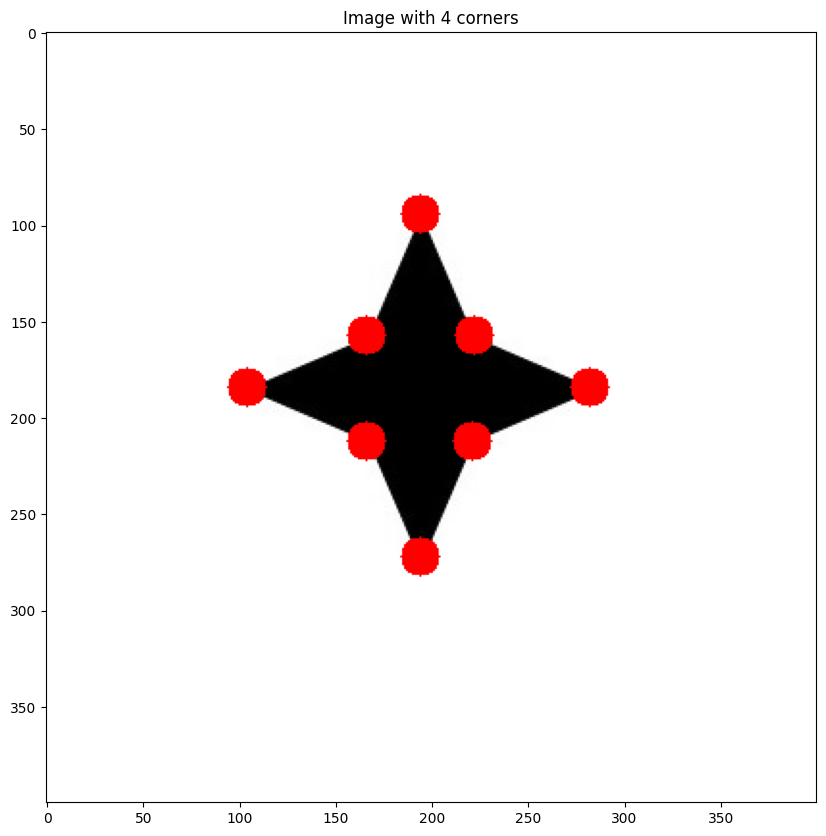

In [12]:
import math
img = cv2.imread('/content/images/4star.jpg')
 
# Convert the image to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   
 
######## The code in this block is optional #########
## Turn the image into a black and white image and remove noise
## using opening and closing
 
#gray = cv2.threshold(gray, 75, 255, cv2.THRESH_BINARY)[1]
 
#kernel = np.ones((5,5),np.uint8)
 
#gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
#gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
 
## To create a black and white image, it is also possible to use OpenCV's
## background subtraction methods to locate the object in a real-time video stream 
## and remove shadows.
## See the following links for examples 
## (e.g. Absolute Difference method, BackgroundSubtractorMOG2, etc.):
## https://automaticaddison.com/real-time-object-tracking-using-opencv-and-a-webcam/
## https://automaticaddison.com/motion-detection-using-opencv-on-raspberry-pi-4/
 
############### End optional block ##################
 
# Apply a bilateral filter. 
# This filter smooths the image, reduces noise, while preserving the edges
bi = cv2.bilateralFilter(gray, 5, 75, 75)
 
# Apply Harris Corner detection.
# The four parameters are:
#   The input image
#   The size of the neighborhood considered for corner detection
#   Aperture parameter of the Sobel derivative used.
#   Harris detector free parameter 
#   --You can tweak this parameter to get better results 
#   --0.02 for tshirt, 0.04 for washcloth, 0.02 for jeans, 0.05 for contour_thresh_jeans
#   Source: https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
dst = cv2.cornerHarris(bi, 2, 3, 0.02)
 
# Dilate the result to mark the corners
dst = cv2.dilate(dst,None)
 
# Create a mask to identify corners
mask = np.zeros_like(gray)
 
# All pixels above a certain threshold are converted to white         
mask[dst>0.025*dst.max()] = 255
 
# Convert corners from white to red.
#img[dst > 0.01 * dst.max()] = [0, 0, 255]
 
# Create an array that lists all the pixels that are corners
coordinates = np.argwhere(mask)
 
# Convert array of arrays to lists of lists
coordinates_list = [l.tolist() for l in list(coordinates)]
 
# Convert list to tuples
coordinates_tuples = [tuple(l) for l in coordinates_list]
 
# Create a distance threshold
thresh = 50
 
# Compute the distance from each corner to every other corner. 
def distance(pt1, pt2):
    (x1, y1), (x2, y2) = pt1, pt2
    dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return dist
 
# Keep corners that satisfy the distance threshold
coordinates_tuples_copy = coordinates_tuples
i = 1   
for pt1 in coordinates_tuples:
    for pt2 in coordinates_tuples[i::1]:
        if(distance(pt1, pt2) < thresh):
            coordinates_tuples_copy.remove(pt2)      
    i+=1
 
# Place the corners on a copy of the original image
img2 = img.copy()
for pt in coordinates_tuples:
    print(tuple(reversed(pt))) # Print corners to the screen
    cv2.circle(img2, tuple(reversed(pt)), 10, (0, 0, 255), -1)
imshow('Image with 4 corners', img2) 